# Ajuste de curva polinomica




In [23]:
import matplotlib.pyplot as plt 
import numpy as np

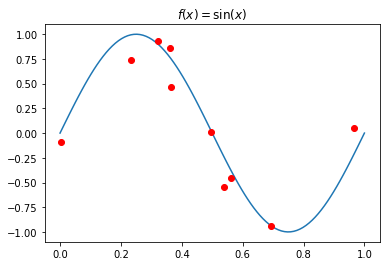

In [24]:
np.random.seed(257915) 
x=np.linspace(0,1,100) 
y=np.sin(2*np.pi*x)
plt.plot(x,y)
plt.title(r'$f(x)=\sin(x)$')

tx=np.sort(np.random.rand(10))
y_tx=np.sin(2*np.pi*tx)

s=np.random.uniform(-0.3,0.3,tx.shape)
ty= y_tx + s 

plt.plot(tx,ty,'ro')

Se ajustarán los datos usando una función polinomial de la forma:

$$y(x,\boldsymbol{w}) = w_0 + w_1x + w_2x^2+ . . . + w_M x^M = \sum_{j=0}^M w_jx^j$$

Donde M es el orden del polinomio y $w=[w_0,\cdots,w_M]$ son los coeficientes del polinomio.

# Funcion Error de ajuste 


In [25]:
def sse(w) : #----> Se define una funcion de error. (w es un vector) 
    si=0
    
    for i in range(10):
        x=tx[i]
        t=ty[i]
        xi=np.zeros(len(w))
        for j in range(len(w)):
            xi[j]=pow(x,j)
        si= pow(np.dot(xi,w)-t,2)+ si
    return si


# optimizacion de la funcion de error 
aqui encontamos los $W=[w_1,\cdots,w_n]$ optimos para el polinomio de grado n


In [26]:
from scipy.optimize import minimize
W=[]
for i in range(10):
    p=np.zeros(i+1) # ---> es un vector de ceros de tamaño i+1, 
    res=minimize(sse,p,method='nelder-mead',options={'xtol':1e-8,'disp':False})#---> optiomizamos la funcion de error ss(e) teniendo encuenta el numero de elementos de p
    W.append(res.x)
 

# Graficas 

aqui se define primero una funcion que me devuelve el vector $X=[1,x,x^2,\cdots,x^n]$ para luego hacer $Y=W\cdot X $ para cada poli de grado n

In [27]:
def X(x,W) :
    X=np.zeros(len(W))
    for i in range(len(W)) :
        X[i]=pow(x,i)
    return X      

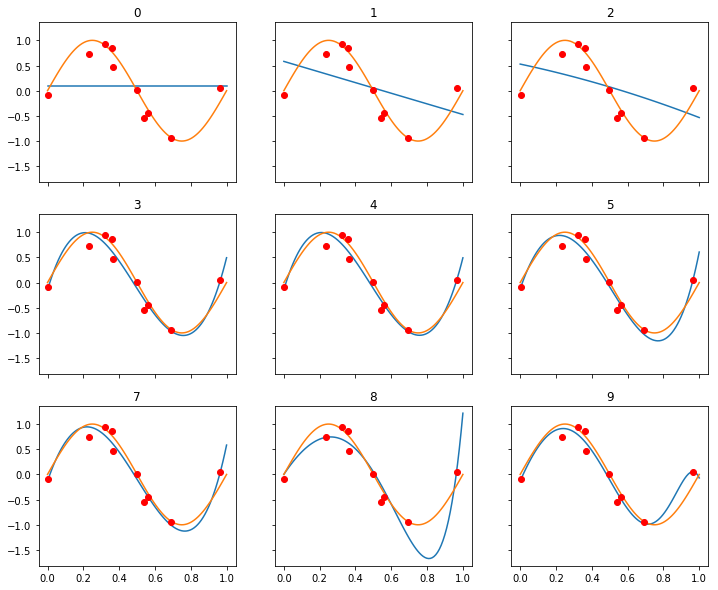

In [37]:
fig, ax = plt.subplots( 3, 3 ,sharex = True, sharey = True, figsize=(12,10))

for k in range(3):
    for j in range(3):  
        n=pow(2,k)+j+2*k-1 #---> para producir la secuencia 012345789
        x1=np.linspace(0,1,100)
        y1=np.zeros(100)
        for i in range(len(y1)):
            y1[i]=np.dot(W[n],X(x1[i],W[n]))
        ax[k,j].plot(x1,y1)
        ax[k,j].plot(x,y)        
        ax[k,j].plot(tx,ty,'ro')
        ax[k,j].set_title(n) #--> titulo de cada subplot    
        